# Transfer Learning Using MobileNetV2

In [17]:
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

Create the base model from the pre-trained model MobileNet V2 which is trained on imagenet Dataset
which consists of 1.2M labelled images.

In [18]:
ImageDataGenerator = tf.keras.preprocessing.image.ImageDataGenerator
SIZE = (128, 128, 3)

imagenet = tf.keras.applications.MobileNetV2(input_shape=SIZE,
                                               include_top=False,
                                               weights='imagenet')

In [19]:
# don't adjust weights of imagenet model which are already trained
imagenet.trainable = False
# model summary
imagenet.summary()

Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 129, 129, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 64, 64, 32)   864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 64, 64, 32)   128         Conv1[0][0]                      
_______________________________________________________________________________

In [20]:
#Defining New Model with imagenet as the Base Model using Sequential Api
model = tf.keras.models.Sequential([
    imagenet,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(15, activation='softmax')
])

In [23]:
#Using ImageDataGenerator to ease Data preparation as it lables images based on Folder Name which is ideal for the way Data Set is arranged
TRAINING_DIR = "Top15data/training"
train_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    class_mode='categorical',
                                                    target_size=(128, 128))

VALIDATION_DIR = "Top15data/validation"
validation_datagen = ImageDataGenerator(rescale=1.0/255.)
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              batch_size=32,
                                                              color_mode="rgb",
                                                              class_mode='categorical',
                                                              target_size=(128, 128))

Found 60646 images belonging to 15 classes.
Found 6738 images belonging to 15 classes.


- Using `Adam` as it works well with image classification and can adjust Learning rate while training unlike `GradientDescentOptimizer` where manual LR tuning needs to be done.
- Using `sparse_categorical_crossentropy` as Loss function for similar reasons.

In [24]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()
history = model.fit_generator(train_generator,
                              epochs=50,
                              verbose=1,
                              validation_data=validation_generator)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_128 (Model) (None, 4, 4, 1280)        2257984   
_________________________________________________________________
global_average_pooling2d_3 ( (None, 1280)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 15)                19215     
Total params: 2,277,199
Trainable params: 19,215
Non-trainable params: 2,257,984
_________________________________________________________________
Epoch 1/50
1896/1896 [==============================] - 3069s 2s/step - loss: 1.5217 - acc: 0.5035 - val_loss: 1.5495 - val_acc: 0.5223
Epoch 2/50
1896/1896 [==============================] - 2707s 1s/step - loss: 1.3567 - acc: 0.5505 - val_loss: 1.7019 - val_acc: 0.4951
Epoch 3/50
1896/1896 [==============================] - 2465s 1s/step - loss: 1.3331 - acc: 0.558

In [25]:
# Save Model for future Predictions
model.save('MobileNet_model.h5')

## Plot accuracy and loss

In [26]:
# Retrieve a list of list results on training and test data sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

<Figure size 432x288 with 0 Axes>

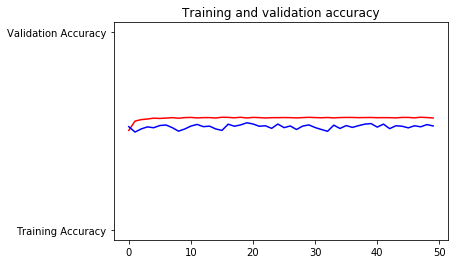

<Figure size 432x288 with 0 Axes>

In [27]:
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.figure()

<Figure size 432x288 with 0 Axes>

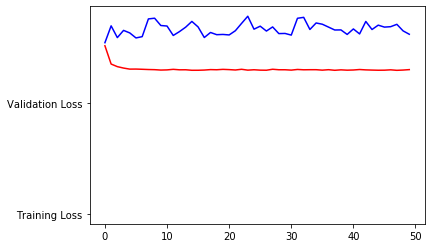

<Figure size 432x288 with 0 Axes>

In [28]:
# Plot training and validation loss per epoch
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.figure()